# Evaluation technique _ Equancy

### Installation et importation des packages 

In [1]:
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install numpy
#!pip3 install seaborn
#!pip3 install -U scikit-learn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


### Analyse des données

#### Importation de la base de données 

In [2]:
#Importation de la base
data=pd.read_csv('data.csv',sep=',', decimal =',')
data.head() #Afficher les cinq premières lignes de la base 

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [3]:
# Explorer le type des données 
data.dtypes

Entreprise       object
Metier           object
Technologies     object
Diplome          object
Experience      float64
Ville            object
dtype: object

1) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs
manquantes ?

In [4]:
# Nombre d'observations
print('La base contient',len(data) ,'observations'+'\n')
# Nombre de valeurs manquantes par variable
print(data.isna().sum(),'\n')
print ('Les variables "Entreprise", "Metier" et "Experience" contiennent des valeurs manquantes'+'\n') 

La base contient 9582 observations

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64 

Les variables "Entreprise", "Metier" et "Experience" contiennent des valeurs manquantes



2.a. Réaliser l'imputation des valeurs manquantes pour la variable "Experience"
avec la valeur médiane pour les data scientists

In [5]:
# Créer une copie de la base initiale surlaquelle on va faire les modifications
c_data=data

# Calculer la mediane d'expérience des data scientists 
median_sc=c_data[c_data['Metier']=="Data scientist"]['Experience'].dropna().median()

# Remplacer toute valeur avec condition nulle et data scientist par cette médiane
c_data.loc[c_data['Metier']=="Data scientist",'Experience']=c_data.loc[c_data['Metier']=="Data scientist",'Experience'].fillna(median_sc)

# S'assurer que le nombre des valeurs manquantes chez les data scientists est null en terme d'expérience
print('Le nombre de valeurs manquantes pour l expérience des data scientists est : ',c_data.loc[c_data['Metier']=="Data scientist",'Experience'].isna().sum())

Le nombre de valeurs manquantes pour l expérience des data scientists est :  0


b.2. Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec la valeur moyenne pour les data engineers

In [6]:
# Le nombre d'expérience moyen pour les data engineers 
mean_en=c_data[c_data['Metier']=="Data engineer"]['Experience'].dropna().mean()

#Remplacer toute valeur avec condition nulle et data scientist par cette moyenne
c_data.loc[c_data['Metier']=="Data engineer",'Experience']=c_data.loc[c_data['Metier']=="Data engineer",'Experience'].fillna(mean_en)

# S'assurer que le nombre des valeurs manquantes chez les data engineers est null en terme d'expérience
print('Le nombre de valeurs manquantes pour l expérience des data engineers est : ',c_data.loc[c_data['Metier']=="Data engineer",'Experience'].isna().sum())


Le nombre de valeurs manquantes pour l expérience des data engineers est :  0


3) Combien d'années d'expériences ont, en moyenne, chacun des profils : le
data scientist, le lead data scientist et le data engineer en moyenne ?

In [7]:
#Imputation des valeurs manquantes en nombre d'expérience pour chaque profil  par la moyenne 

#Calcler la moyenne de chaque profile 
mean_sc=c_data[c_data['Metier']=="Data scientist"]['Experience'].dropna().mean()
mean_L_sc=c_data[c_data['Metier']=="Lead data scientist"]['Experience'].dropna().mean()
mean_ar=c_data[c_data['Metier']=="Data architecte"]['Experience'].dropna().mean()

#Remplacer toute valeur avec condition nulle  par la moyenne calculée du le profil concerné
c_data.loc[c_data['Metier']=="Data scientist",'Experience']=c_data.loc[c_data['Metier']=="Data scientist",'Experience'].fillna(mean_sc)
c_data.loc[c_data['Metier']=="Lead data scientist",'Experience']=c_data.loc[c_data['Metier']=="Lead data scientist",'Experience'].fillna(mean_L_sc)
c_data.loc[c_data['Metier']=="Data architecte",'Experience']=c_data.loc[c_data['Metier']=="Data architecte",'Experience'].fillna(mean_ar)

#S'assurer qu'il n ya plus de valeurs manquantes
c_data['Experience'].isna().sum() 

0

In [8]:
# Nombres d'années d'expérience moyen des data scientists :
print('En moyenne, les data scientists ont ',round(mean_sc,2),'années d expérience.')
# Nombres d'années d'expérience moyen des Lead data scientists :
print('En moyenne, les Lead data scientists ont ',round(mean_L_sc,2),'années d expérience.')
# Nombres d'années d'expérience moyen des data engineer :
print('En moyenne, les data engineers ont', round(mean_en,2),'années d expérience.')
# Nombres d'années d'expérience moyen des data architectes  :
print('En moyenne, les Data architecte ont', round(mean_ar,2),'années d expérience.')

En moyenne, les data scientists ont  2.24 années d expérience.
En moyenne, les Lead data scientists ont  3.97 années d expérience.
En moyenne, les data engineers ont 2.98 années d expérience.
En moyenne, les Data architecte ont 3.0 années d expérience.


4) Faire la représentation graphique de votre choix afin de comparer le
nombre moyen d'années d'expériences pour chaque métier

Text(0.5, 1.0, "Comparaison des métiers par années d'expérience")

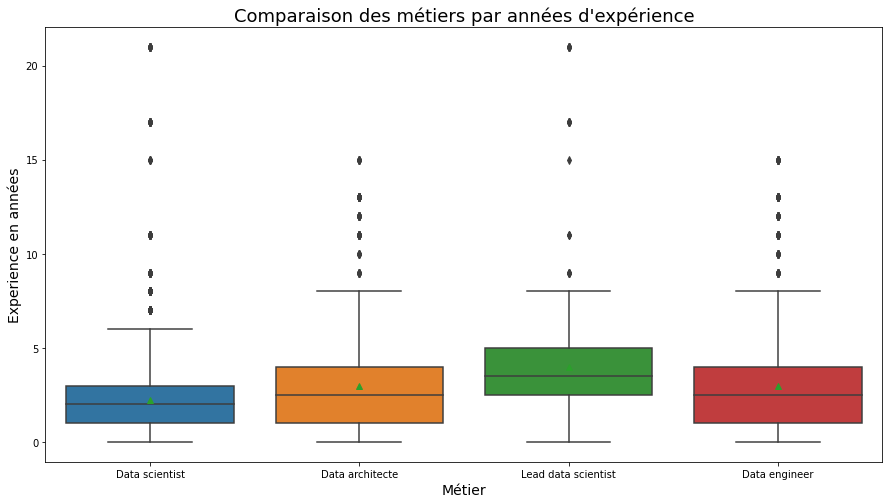

In [9]:
# 1 ère pensée  : visualisation du nombre moyen d'expérience sur les boxplots car on peut voir les moyennes et s'il existe une différence significative entre elles
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="Metier", y="Experience", data=c_data,showmeans=True)
plt.ylabel("Experience en années", size=14)
plt.xlabel("Métier", size=14)
plt.title("Comparaison des métiers par années d'expérience", size=18)


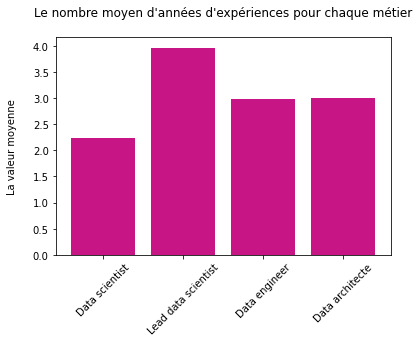

In [10]:
# Pour une visualisation plus claire des moyennes nous allons utiliser les bar plot
X=('Data scientist', 'Lead data scientist', 'Data engineer', 'Data architecte') #Axe des abscisses 
Y=[mean_sc,mean_L_sc,mean_en,mean_ar] #Les valeurs pour chaque métier 
plt.bar(X,Y,color='mediumvioletred')
plt.xticks(X,rotation=45)
plt.ylabel("La valeur moyenne\n")
plt.title("Le nombre moyen d'années d'expériences pour chaque métier\n")
plt.show()

* Les Lead data scientists ont la plus grande moyenne en terme d'années d'expérience. Ce résultat était attendu vu que le poste de "Lead" exige déjà un profil expérimenté par rapport au reste des profils de la base. Donc leur recrtuement est essentiellement basé sur leur grand nombre d'années d'expérience.
* Les data enginners et data architectes ont une moyenne d'expérience comparables et ont plus d'expertise que les  data scientists. L'exigence en nombre d'expérience pour le poste de data engineer / architecte est souvent plus sévère lors du recrutement par rapport à un data scientist. Ce ci peut reflèter la complexité du métier du data engineer/data architecte par rapport au data scientist.
* Les data scientists ont le nombre d'années d'expérience le plus faible. C'est le poste le moins exigeant en terme d'années d'expérience lors du recrutement.


5) Transformer la variable continue 'Experience' en une nouvelle variable
catégorielle 'Exp_label' à 4 modalités : débutant, confirmé, avancé et expert.
Veuillez expliquer votre choix de la règle de transformation

In [11]:
# Observer le comportement de la variable pour décider de la méthode de transformation
print(c_data['Experience'].describe(),'\n','\n')


count    9582.000000
mean        2.814553
std         2.703857
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64 
 



Le choix des intervalles est basée sur des recherches des années d'expériences à assigner à chaque label 

* Débutant : de 0 à 2 ans d’expérience.
* Confirmé : de 3 à 4 ans d’expérience.
* Avancé   : entre 5 et 10 ans d’expérience.
* Expert  : au-dessus de 10 anns d’expérience.

sources :
*  https://fleid.net/2012/10/09/consultants-juniors-confirmes-seniors-quels-criteres-pour-quantifier-lexperience/
*  https://www.cadremploi.fr/editorial/conseils/salaire/detail/article/cadres-seniors-comment-baisser-ses-pretentions-salariales-sans-perdre-la-face.html


In [12]:
c_data['Exp_label']=pd.cut(c_data.Experience,bins=[-1,2,4,10,99],labels=['Debutant','Confirmé','Avancé','Expert'])
c_data

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Debutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Debutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Debutant
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,Debutant
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,Expert
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Debutant
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,Expert


6) Quelles sont les 5 technologies les plus utilisées ? Faites un graphique


In [13]:
# Les 5 technologies les plus utilisées
print('Les 5 technologies les plus utilisées sont :')
c_data.Technologies.apply(lambda x : x.split("/")).explode().value_counts().head(5)

Les 5 technologies les plus utilisées sont :


Python    6627
R         4374
SQL       2581
Java      1719
Hadoop    1589
Name: Technologies, dtype: int64

Text(0.5, 1.0, 'Les 5 top technologies les plus utilisés')

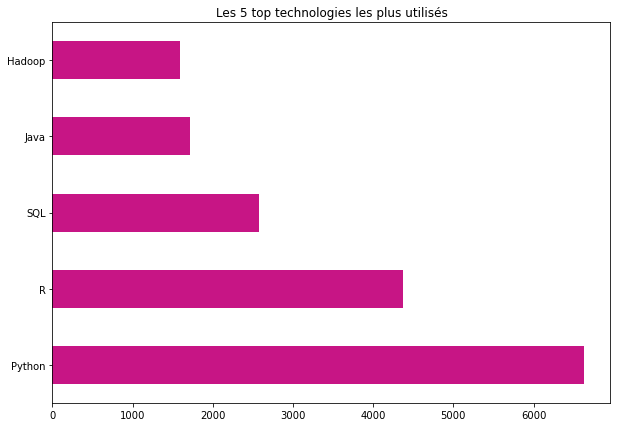

In [14]:
# Plot des 5 technologies les plus utilisées
c_data.Technologies.apply(lambda x : x.split("/")).explode().value_counts().head(5).plot(kind='barh', figsize=(10,7),color='mediumvioletred')
plt.title('Les 5 top technologies les plus utilisés')

7) Réaliser une méthode de clustering non supervisée de votre choix pour faire
apparaître le nombre de clusters que vous jugerez pertinents. Donnez les
caractéristiques de chacun des clusters.

* La consigne était de faire  Un clustering non supervisé afin d'identifier 2 groupes de profils
techniques distincts donc puisque le nombre de groupe est connu, le plus simple serait d'utiliser les k-means avec k=2.

* Les k-means sont basés sur la distance entre les observations. Toutes les variables catégorielles doivent donc être codées en valeurs numériques afin que les calculs puissent être effectués.

* L'expérience étant la seule variable numérique, une nouvelle base de données sera créée pour contenir toutes les variables catégorielles codées.

* La méthode d'encodage recommandée est le One Hot encoding , il s'agit de créer une nouvelle colonne pour chaque modalité. On assigne les valeurs 1 si la modalité existe pour l'observation concernée et 0 sinon.


In [15]:
df_no_na = c_data[["Experience","Metier", "Diplome","Technologies"]].dropna()
len(df_no_na)

9563

In [16]:
#na_me=c_data.loc[c_data['Metier'].isna()==False]
outils= df_no_na.Technologies.apply(lambda x : x.split("/")).explode()
outils=pd.DataFrame(outils)
outils=outils.rename(columns={"Technologies": "Outils"})
outils

,Outils
0,Matlab
0,Python
0,Pyspark
0,Scikit-learn
0,Tensorflow
...,...
9580,Microsoft Azure
9581,VBA
9581,Python
9581,Excel


In [17]:
# Appliquer le One hot encoding 
outils_hot_enc = pd.get_dummies(outils["Outils"], columns= ["Outils"])
# Faire un check sur le nom des colonnes 
outils_hot_enc.columns
# Un des colonnes est une chaine vide
outils_hot_enc=outils_hot_enc.drop([''], axis=1)
# Inclure l'index dans la base pour faire l'aggrégation plus tard
outils_hot_enc=outils_hot_enc.reset_index()
# Sommer les valeurs ayant le meme index pour obtenir des lignes uniques 
outils_hot_enc=outils_hot_enc.groupby('index').sum().reset_index()
outils_hot_enc
# drop index 
#outils_hot_enc=outils_hot_enc.drop(['index'], axis=1)
outils_hot_enc=outils_hot_enc[['index','Python','R','SQL','Java','Hadoop']] # Choisir que les 5 premiers outils les plus utilisés sinn on aura plus que 60 colonnes et le modèle risque de ne pas bien classifier

outils_hot_enc

,index,Python,R,SQL,Java,Hadoop
0,0,1,0,0,0,0
1,1,1,0,0,1,0
2,2,1,1,1,0,0
3,3,1,0,0,1,0
4,4,1,0,0,0,0
...,...,...,...,...,...,...
9558,9577,1,1,0,0,0
9559,9578,1,1,0,0,0
9560,9579,0,1,0,0,0
9561,9580,1,0,0,0,0


In [18]:
# S'assurer que le maximum de chaque variable est 1
outils_hot_enc.describe().loc[['min','max']]

,index,Python,R,SQL,Java,Hadoop
min,0.0,0.0,0.0,0.0,0.0,0.0
max,9581.0,1.0,1.0,1.0,1.0,1.0


In [19]:
# Ajouter à la variable experience les variables encodés de métier et diplome, les variables entreprises et ville ne me semblent pas significatifs
#c_data_coded = df_no_na['Experience']
c_data_coded = pd.get_dummies(df_no_na[["Experience","Metier", "Diplome"]], columns= ["Metier", "Diplome"])
c_data_coded=c_data_coded.reset_index()
c_data_coded

,index,Experience,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd
0,0,1.0,0,0,1,0,0,1,0,0
1,1,3.0,1,0,0,0,0,1,0,0
2,2,3.0,0,0,0,1,0,1,0,0
3,3,1.5,0,0,1,0,0,1,0,0
4,4,2.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9558,9577,1.5,0,0,1,0,0,1,0,0
9559,9578,11.0,0,0,1,0,0,1,0,0
9560,9579,1.0,0,0,1,0,0,1,0,0
9561,9580,17.0,0,0,1,0,0,1,0,0


In [20]:
coded_data_all = pd.merge(c_data_coded, outils_hot_enc, on='index', how='inner')
coded_data_all

,index,Experience,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,1,3.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,3.0,0,0,0,1,0,1,0,0,1,1,1,0,0
3,3,1.5,0,0,1,0,0,1,0,0,1,0,0,1,0
4,4,2.0,0,0,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,9577,1.5,0,0,1,0,0,1,0,0,1,1,0,0,0
9559,9578,11.0,0,0,1,0,0,1,0,0,1,1,0,0,0
9560,9579,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0
9561,9580,17.0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [21]:
"""
# concatenaer les deux dataframes
coded_data_all = pd.concat([c_data_coded, outils_hot_enc], axis=1)
coded_data_all
len(coded_data_all)
"""
len(coded_data_all)

9563

In [22]:
coded_data_all

,index,Experience,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,1,3.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,3.0,0,0,0,1,0,1,0,0,1,1,1,0,0
3,3,1.5,0,0,1,0,0,1,0,0,1,0,0,1,0
4,4,2.0,0,0,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,9577,1.5,0,0,1,0,0,1,0,0,1,1,0,0,0
9559,9578,11.0,0,0,1,0,0,1,0,0,1,1,0,0,0
9560,9579,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0
9561,9580,17.0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [23]:
coded_data_all=coded_data_all.drop(columns="index",axis=1)
coded_data_all

,Experience,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,1.0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,3.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,3.0,0,0,0,1,0,1,0,0,1,1,1,0,0
3,1.5,0,0,1,0,0,1,0,0,1,0,0,1,0
4,2.0,0,0,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,1.5,0,0,1,0,0,1,0,0,1,1,0,0,0
9559,11.0,0,0,1,0,0,1,0,0,1,1,0,0,0
9560,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0
9561,17.0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [24]:
# Standardiser la base de données 
scaler = MinMaxScaler() # Permet de standardiser la base de données pour obtenir des nouvelles valeurs avec une moyenne nulle et un écart-type de 1. Cette étape est importante pour s'assurer qu'une variable n'est pas interprétée comme étant plus importante que l'autre.
scaled_features = scaler.fit_transform(coded_data_all) #appliquer la  standardisation
scaled_features # Résultats 

array([[0.04761905, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.04761905, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.80952381, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

a. Justifier le nombre de clusters 


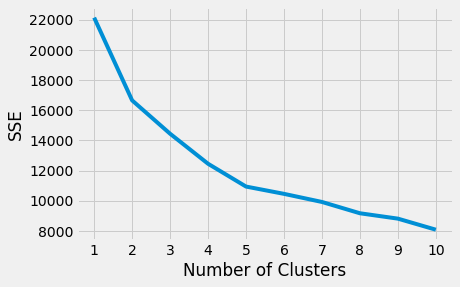

L effet de coude est observable pour k=5


In [25]:
# A list holds the SSE values for each k
km = {
     "init": "random",
     "n_init": 10,
     "max_iter": 100,
     "random_state": 42,

}
# A list holds the SSE values for each k

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **km)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
print ('L effet de coude est observable pour k=5')

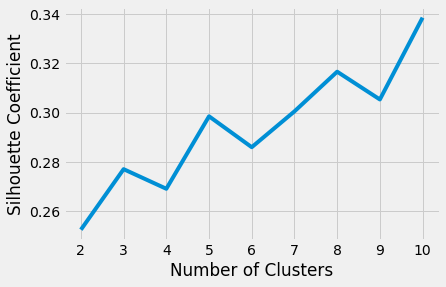

In [26]:
km = {
     "init": "random",
     "n_init": 10,
     "max_iter": 100,
     "random_state": 42,

}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
#Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **km)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

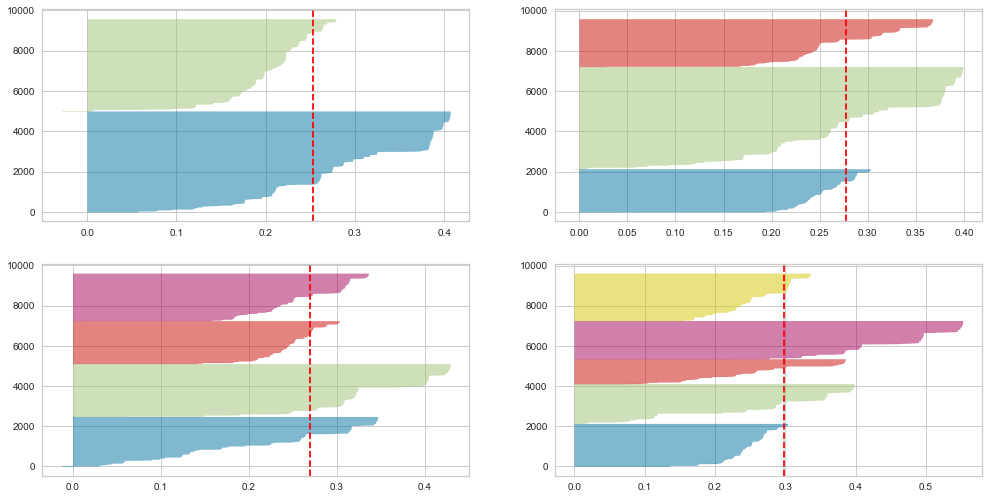

In [27]:
#!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_features)

b. Justifier la performance de votre algorithme grâce à une métrique.

In [28]:
kmeans = KMeans(
     init="random", # init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random"
     n_clusters=3, # n_clusters sets k for the clustering step. This is the most important parameter for k-means.
     n_init=10, # n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.
     max_iter=100, # max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.
     random_state=42 # Fixer la graine
)

kmeans.fit(scaled_features)


score = silhouette_score(scaled_features, kmeans.labels_, metric='euclidean')
print('L indice de silhouette est égale à ', round(score ,2) ,'\n')  #0.15 si on garde tous les outils
print('Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters, plus c est proche de 1, mieux c est. ') 

L indice de silhouette est égale à  0.28 

Cet cet indice reflète la distance entre les points au sein d un meme cluster et entre les clusters, plus c est proche de 1, mieux c est. 


In [29]:
#SSE value
kmeans.inertia_

14442.889125205595

In [30]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 1])

In [31]:
len(kmeans.labels_)

9563

 c. Donnez les caractéristiques de chacun des clusters et interprétez.

In [32]:
len(df_no_na)

9563

In [33]:
# concaténer les clusters avec la base de données ( sans valeurs manquantes) 
df_no_na_con = c_data[["Experience","Metier", "Diplome","Technologies","Exp_label"]].dropna().reset_index(drop=True)
labels_ = kmeans.labels_
labels= pd.DataFrame(labels_)
labeleddata = pd.concat((df_no_na_con,labels),axis=1)
labeleddata = labeleddata.rename({0:'labels'},axis=1)
len(labeleddata)

9563

<AxesSubplot:xlabel='Metier', ylabel='Count'>

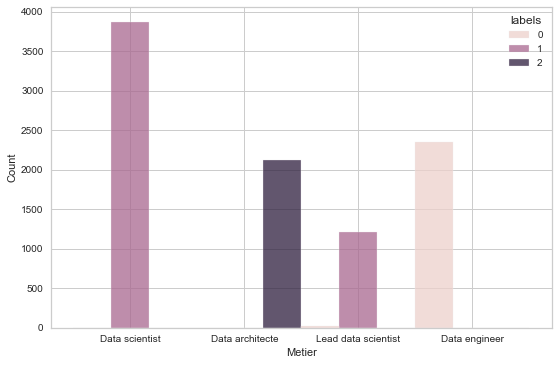

In [34]:
sns.histplot(binwidth=1,
            x="Metier",
            hue="labels",
            data=labeleddata,
            stat="count",
            multiple="dodge")

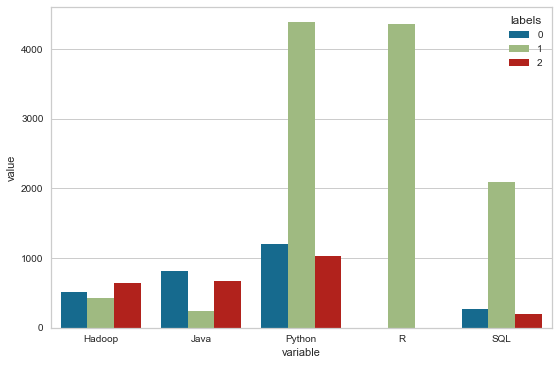

In [35]:
# Création d'une nouvelle base pour le plot des outils par cluster 
# Ajout des labels à la base ou les outils sont encodés
get_tools=coded_data_all
get_tools['labels']=labeleddata['labels']
values_counts=get_tools[["Python","R",	"SQL",	"Java",	"Hadoop","labels"]]
# transformer la base de sorte que les colonnes deviennent en ligne avec un ordre basé sur les labes
melting=values_counts.melt(id_vars=["labels"])
#Conserver que les observations ou les outils ont été utilisé
only_used_tools=melting.loc[melting['value']==1]
# sommer les 1 pour obtenir le nombre d'utilisateurs par outil et par cluster
tools_data=only_used_tools.groupby(by=["variable","labels"]).sum().reset_index()
# barplot 
sns.barplot(x = 'variable', y = 'value', hue = 'labels', data = tools_data)
 
# Show the plot
plt.show()

<AxesSubplot:xlabel='Diplome', ylabel='Count'>

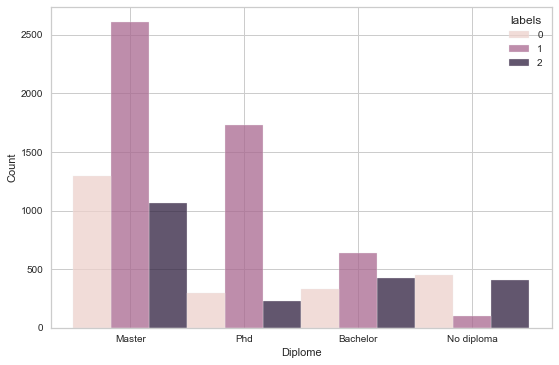

In [36]:
sns.histplot(binwidth=1,
            x="Diplome",
            hue="labels",
            data=labeleddata,
            stat="count",
            multiple="dodge")

#Le cluster 1 est caractérisé par les diplomés en Master , bachelor et non diplomé
# Le cluster 2 est des profils ayant le master et PhD

<AxesSubplot:xlabel='Count', ylabel='Exp_label'>

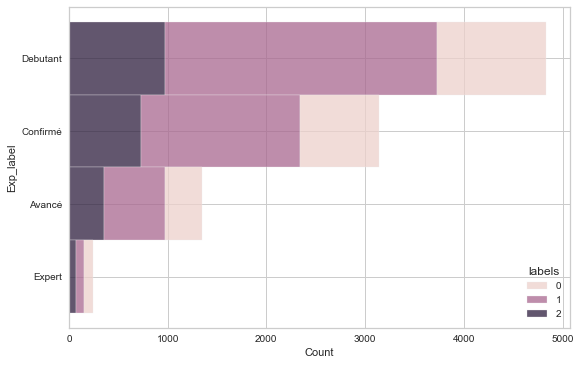

In [37]:
sns.histplot(binwidth=0.5,y="Exp_label", hue="labels", data=labeleddata, stat="count", multiple="stack")
# Le cluster 1 inclue les profils confirmé, avancé et expert 

In [38]:
list= ["SQL/R/Python//Big data","SAS/Teradata/SQL/R/Python/Machine learning/Anglais","C++/R/Python/Matlab/Matplotlib","Hadoop/Hive/Vertica/Tableau","SPSS/Excel/SAS/R/machine learning/AI/Scoring"]

In [39]:
top_5= labeleddata.loc[labeleddata['Technologies'].isin(list)]
top_5['Technologies'].value_counts()

SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    455
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Hadoop/Hive/Vertica/Tableau                           247
Name: Technologies, dtype: int64

([0, 1, 2, 3, 4],
 [Text(Technologies, 0, ''),
  Text(Technologies, 0, ''),
  Text(Technologies, 0, ''),
  Text(Technologies, 0, ''),
  Text(Technologies, 0, '')])

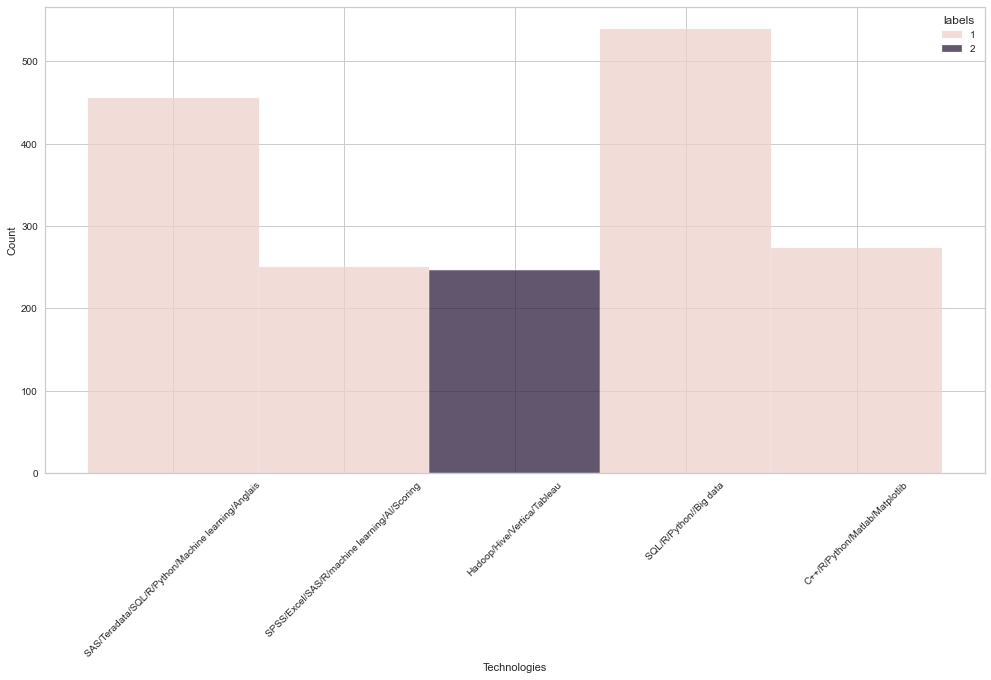

In [40]:
plt.figure(figsize=(15,8))
#labeleddata['Ville'].value_counts()
sns.histplot(binwidth=0.2, x="Technologies", hue="labels", data=top_5, stat="count", multiple="stack")
plt.xticks(x="Technologies",rotation=45)


8) Réaliser la prédiction des métiers manquants dans la base de données par
l'algorithme de votre choix
* a. Justifier la performance de votre algorithme grâce à une métrique.
* b. Interpréter votre résultat.

In [41]:

drop_metier=coded_data_all.drop(columns=["Metier_Data architecte",	"Metier_Data engineer",	"Metier_Data scientist","Metier_Lead data scientist","labels"],axis=1,inplace=False)

In [42]:
drop_metier

,Experience,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,1.0,0,1,0,0,1,0,0,0,0
1,3.0,0,1,0,0,1,0,0,1,0
2,3.0,0,1,0,0,1,1,1,0,0
3,1.5,0,1,0,0,1,0,0,1,0
4,2.0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9558,1.5,0,1,0,0,1,1,0,0,0
9559,11.0,0,1,0,0,1,1,0,0,0
9560,1.0,0,1,0,0,0,1,0,0,0
9561,17.0,0,1,0,0,1,0,0,0,0


In [43]:
drop_metier.columns

Index(['Experience', 'Diplome_Bachelor', 'Diplome_Master',
       'Diplome_No diploma', 'Diplome_Phd', 'Python', 'R', 'SQL', 'Java',
       'Hadoop'],
      dtype='object')

In [44]:
label_encoder = preprocessing.LabelEncoder()
X = np.array(drop_metier)
Y = label_encoder.fit_transform(c_data.loc[c_data.loc[:,'Metier'].isna()==False,'Metier'])

In [45]:
#Splitting 
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.25, shuffle=True, random_state=10)

In [46]:
# Modèles à essayer 
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

# Fitting des modèles
LR_fit = LR.fit(X_train, Y_train)
KNN_fit = KNN.fit(X_train, Y_train)
NB_fit = NB.fit(X_train, Y_train)
LSVM_fit = LSVM.fit(X_train, Y_train)
NLSVM_fit = NLSVM.fit(X_train, Y_train)
DT_fit = DT.fit(X_train, Y_train)
RF_fit = RF.fit(X_train, Y_train)

#Prédiction 
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)

# Résultats de l'accuracy pour chaque modèle
print("Logistic Regression is %f percent accurate" % (accuracy_score(LR_pred, Y_test)*100))
print("KNN is %f percent accurate" % (accuracy_score(KNN_pred, Y_test)*100))
print("Naive Bayes is %f percent accurate" % (accuracy_score(NB_pred, Y_test)*100))
print("Linear SVMs is %f percent accurate" % (accuracy_score(LSVM_pred, Y_test)*100))
print("Non Linear SVMs is %f percent accurate" % (accuracy_score(NLSVM_pred, Y_test)*100))
print("Decision Trees is %f percent accurate" % (accuracy_score(DT_pred, Y_test)*100))
print("Random Forests is %f percent accurate" % (accuracy_score(RF_pred, Y_test)*100))

C:\Users\Mariem Bouhadda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mariem Bouhadda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic Regression is 64.324550 percent accurate
KNN is 65.621079 percent accurate
Naive Bayes is 62.818904 percent accurate
Linear SVMs is 64.240903 percent accurate
Non Linear SVMs is 66.959431 percent accurate
Decision Trees is 69.385194 percent accurate
Random Forests is 69.301547 percent accurate


The best model in term of accuracy is Random forest with 69.92% of accuracy

#### Prediction of missing values 

In [47]:
# subset de la base ou les métiers sont manquants
data_na_met=c_data[c_data.loc[:,'Metier'].isna()==True]
#Garder que les variables dont on aura besoin pour la prédiction
data_na_met_no=data_na_met[["Experience","Diplome","Technologies"]]
# Exploser la variable Technilogies
outils_na_met_no= data_na_met_no.Technologies.apply(lambda x : x.split("/")).explode()
outils_na_met_no=pd.DataFrame(outils_na_met_no)
outils_na_met_no=outils_na_met_no.rename(columns={"Technologies": "Outils"})
outils_na_met_no

,Outils
346,Python
346,Spark
346,GNU
346,Linux
2058,VBA
...,...
9490,Python
9490,Spark
9490,Pycharm
9490,SAS


In [48]:
# One hot encoding des outils
# Appliquer le One hot encoding 
outils_hot_enc_na_met = pd.get_dummies(outils_na_met_no["Outils"], columns= ["Outils"])
# Faire un check sur le nom des colonnes 
outils_hot_enc_na_met.columns
# Inclure l'index dans la base pour faire l'aggrégation plus tard
outils_hot_enc_na_met=outils_hot_enc_na_met.reset_index()
# Sommer les valeurs ayant le meme index pour obtenir des lignes uniques 
outils_hot_enc_na_met=outils_hot_enc_na_met.groupby('index').sum().reset_index()

#outils_hot_enc=outils_hot_enc.drop(['index'], axis=1)
outils_hot_enc_na_met=outils_hot_enc_na_met[['index','Python','R','SQL','Java','Hadoop']] # Choisir que les 5 premiers outils les plus utilisés sinn on aura plus que 60 colonnes et le modèle risque de ne pas bien classifier

outils_hot_enc_na_met

,index,Python,R,SQL,Java,Hadoop
0,346,1,0,0,0,0
1,2058,1,1,0,0,0
2,2670,1,1,0,1,0
3,2899,1,1,0,0,0
4,3346,0,0,0,0,0
5,4248,1,1,1,0,0
6,4290,1,1,1,0,0
7,4292,1,1,1,0,0
8,5425,1,0,0,0,0
9,5593,1,1,0,0,0


In [49]:
# Ajouter à la variable experience les variables encodés de métier et diplome, les variables entreprises et ville ne me semblent pas significatifs
#c_data_coded = df_no_na['Experience']
c_data_coded_na_met = pd.get_dummies(data_na_met[["Experience", "Diplome"]], columns= [ "Diplome"])
c_data_coded_na_met=c_data_coded_na_met.reset_index()
c_data_coded_na_met

,index,Experience,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd
0,346,2.5,0,0,1,0
1,2058,15.0,0,1,0,0
2,2670,1.5,0,1,0,0
3,2899,0.0,0,0,0,1
4,3346,7.0,0,1,0,0
5,4248,2.0,0,0,0,1
6,4290,1.5,0,0,0,1
7,4292,8.0,0,1,0,0
8,5425,5.0,0,0,1,0
9,5593,3.0,0,1,0,0


In [50]:
coded_data_all_na_met = pd.merge(c_data_coded_na_met, outils_hot_enc_na_met, on='index', how='inner')
coded_data_all_na_met=coded_data_all_na_met.drop(columns="index",axis=1)
coded_data_all_na_met

,Experience,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Python,R,SQL,Java,Hadoop
0,2.5,0,0,1,0,1,0,0,0,0
1,15.0,0,1,0,0,1,1,0,0,0
2,1.5,0,1,0,0,1,1,0,1,0
3,0.0,0,0,0,1,1,1,0,0,0
4,7.0,0,1,0,0,0,0,0,0,0
5,2.0,0,0,0,1,1,1,1,0,0
6,1.5,0,0,0,1,1,1,1,0,0
7,8.0,0,1,0,0,1,1,1,0,0
8,5.0,0,0,1,0,1,0,0,0,0
9,3.0,0,1,0,0,1,1,0,0,0


In [51]:
len(coded_data_all_na_met)

19

In [52]:
# Standardiser la base de données 
scaler = MinMaxScaler() # Permet de standardiser la base de données pour obtenir des nouvelles valeurs avec une moyenne nulle et un écart-type de 1. Cette étape est importante pour s'assurer qu'une variable n'est pas interprétée comme étant plus importante que l'autre.
scaled_features = scaler.fit_transform(coded_data_all_na_met) #appliquer la  standardisation
scaled_features # Résultats 

array([[0.16666667, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ],
       [0.1       , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ],
       [0.46666667, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.13333333, 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ],
       [0.1       , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ],
       [0.53333333, 0.        , 1.       

In [53]:
"""
data_na_met = np.array(c_data[c_data.loc[:,'Metier'].isna()==True])
len(data_na_met)
data_na_met.isna().sum()
"""

"\ndata_na_met = np.array(c_data[c_data.loc[:,'Metier'].isna()==True])\nlen(data_na_met)\ndata_na_met.isna().sum()\n"

In [54]:
#Prédicition les métiers manquants par notre modéle
#The best model in term of accuracy is Decision trees with 89.04% of accuracy
model = RF_fit
predicted_met=model.predict(scaled_features)
predicted_met

array([1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2])

In [55]:
#Remplissage des valeurs manquantes du métier par leurs valeurs prédites 
data_na_met["Metier"]=label_encoder.inverse_transform(predicted_met)
data_na_met['Metier'].isna().sum()


C:\Users\MARIEM~1\AppData\Local\Temp/ipykernel_4884/3792483469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_na_met["Metier"]=label_encoder.inverse_transform(predicted_met)


0

In [56]:
#Affichage
print("Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification des données avec le model de k- plus proches voisins:\n")
data_na_met

Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification des données avec le model de k- plus proches voisins:



,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
346,Jacobs,Data engineer,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Confirmé
2058,Ball Aerospace,Data scientist,VBA/Python/Excel/R,Master,15.0,Lyon,Expert
2670,"eHire, LLC",Data scientist,Java/C/C++/R/Python,Master,1.5,Toulouse,Debutant
2899,Norfolk Southern Corp,Data scientist,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Debutant
3346,J.E. Ranta Associates,Data engineer,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Avancé
4248,KPMG,Data scientist,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Debutant
4290,"Pandora Media, Inc.",Data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Debutant
4292,Partners HealthCare(PHS),Data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Avancé
5425,Ashton Lane Group,Data engineer,Python/Pyspark/Spark,No diploma,5.0,Lyon,Avancé
5593,Lighthouse Lab Services,Data scientist,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Confirmé
